In [1]:
import os
#os.add_dll_directory(r"C:\Program Files\NVIDIA GPU Computing Toolkit\CUDA\v12.6\bin")

import numpy as np
import cv2
import matplotlib.pyplot as plt
from depthwise_color_constancy import depthwise_color_constancy
from tqdm import tqdm

In [3]:
import csv
import time

data_dir = "../data/nyu_data/data"
data_collection = {}

with open(f"{data_dir}/nyu2_train.csv", 'r') as file:
    csv_reader = csv.reader(file)
    for row in csv_reader:

        new_file_path = row[1].replace("nyu2_train", "nyu2_constancy")
        new_file_parent = "/".join(
                    new_file_path.split("/")[:-1]
        )

        rgb = cv2.imread(f"{data_dir}/../{row[0]}").astype(np.float32)/255
        depth = cv2.imread(f"{data_dir}/../{row[1]}").astype(np.float32)
        depth = depth#/depth.max()
        depth = depth.mean(axis=2)

        kernal_shape = np.array([
            [1,1,1],
            [1,1,1],
            [1,1,1]
        ]).astype(np.float32)
        
        start_time = time.time()
        a_c_new = depthwise_color_constancy(
            2000,
            p,
            False,
            0.0,
            depth,
            kernal_shape,
            rgb
        ).reshape((480,640,3))
        data_collection[new_file_path] = {
            "time": time.time() - start_time
        }
        os.makedirs(f"{data_dir}/../{new_file_parent}", exist_ok=True)
        cv2.imwrite(f"{data_dir}/../{new_file_path}", a_c_new * 255)
        print(new_file_path)
        break

data/nyu2_constancy/living_room_0038_out/37.png


[ WARN:0@398.183] global loadsave.cpp:848 imwrite_ Unsupported depth image for selected encoder is fallbacked to CV_8U.


In [ ]:
cv2.imwrite(f"test.png", a_c_new * 255)

True

In [ ]:
kernal_shape = np.array([
    [1,1,1,1,1],
    [1,1,1,1,1],
    [1,1,1,1,1],
    [1,1,1,1,1]
]).astype(np.float32)

start_time = time.time()
a_c_5 = depthwise_color_constancy(
    2000,
    p,
    False,
    0.0,
    depth,
    kernal_shape,
    rgb
).reshape((480,640,3))

kernal_shape = np.array([
    [1,1,1],
    [1,1,1],
    [1,1,1]
]).astype(np.float32)

start_time = time.time()
a_c_3 = depthwise_color_constancy(
    2000,
    0.9999,
    False,
    0.0,
    depth,
    kernal_shape,
    rgb
).reshape((480,640,3))

((a_c_5 - a_c_3) ** 2).mean()

np.float32(0.17104314)

In [ ]:
def compute_converagnce(depth, kernal_shape, rgb, iterations, p=0.9999, doesNaive=False, threshold=0.0):
    prev_image = rgb.reshape((480,640,3))

    mses = []

    for i in tqdm(range(0, iterations)):
        new_image = depthwise_color_constancy(
            1,
            p,
            doesNaive,
            threshold,
            depth,
            kernal_shape,
            prev_image
        ).reshape((480,640,3))
        mses.append(((rgb - new_image) ** 2).mean())
        prev_image = new_image
    return np.array(mses), new_image

kernal_shape = np.array([
    [0,1,0],
    [1,1,1],
    [0,1,0]
]).astype(np.float32)
mses0, a_c_new0 = compute_converagnce(depth, kernal_shape, rgb, 2000, p=0.9999)
kernal_shape = np.ones((3,3)).astype(np.float32)
mses1, a_c_new1 = compute_converagnce(depth, kernal_shape, rgb, 2000, p=0.9999)
kernal_shape = np.ones((5,5)).astype(np.float32)
mses2, a_c_new2 = compute_converagnce(depth, kernal_shape, rgb, 2000, p=0.9999)
kernal_shape = np.ones((7,7)).astype(np.float32)
mses3, a_c_new3 = compute_converagnce(depth, kernal_shape, rgb, 2000, p=0.9999)

kernal_shape = np.array([
    [1,0,1],
    [0,1,0],
    [1,0,1]
]).astype(np.float32)
mses4, a_c_new4 = compute_converagnce(depth, kernal_shape, rgb, 2000, p=0.9999)
kernal_shape = np.ones((3,3)).astype(np.float32)


  0%|          | 0/2000 [00:00<?, ?it/s]

 23%|██▎       | 458/2000 [00:02<00:08, 189.63it/s]


KeyboardInterrupt: 

True

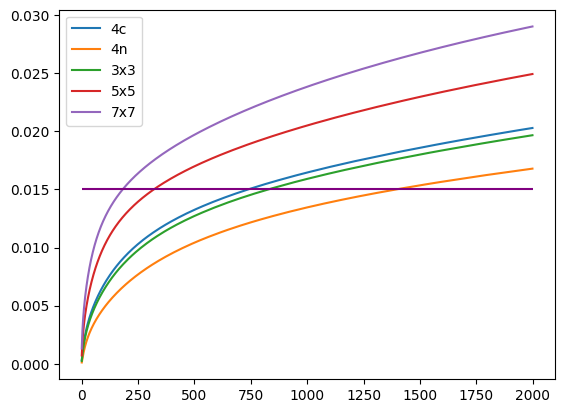

In [ ]:
plt.plot(mses4, label="4c")
plt.plot(mses0, label="4n")
plt.plot(mses1, label="3x3")
plt.plot(mses2, label="5x5")
plt.plot(mses3, label="7x7")
plt.hlines(y=0.015, xmin=0, xmax=2000, colors="purple")
plt.legend()
cv2.imwrite(f"test.png", a_c_new * 255)

In [ ]:
(
    ((a_c_new1 - a_c_new2) ** 2).mean(),
    ((a_c_new3 - a_c_new2) ** 2).mean(),
    ((a_c_new3 - a_c_new1) ** 2).mean(),
    ((a_c_new4 - a_c_new1) ** 2).mean(),
    ((a_c_new0 - a_c_new1) ** 2).mean(),
)

(np.float32(0.0015858193),
 np.float32(0.0006869345),
 np.float32(0.0039634462),
 np.float32(0.0001062741),
 np.float32(0.00045185108))

In [ ]:
# kernal_shape = np.ones((3,3)).astype(np.float32)
# mses1, a_c_new1 = compute_converagnce(depth, kernal_shape, rgb, int((mses1 < 0.015).sum()), p=0.9999)
# kernal_shape = np.ones((5,5)).astype(np.float32)
# mses2, a_c_new2 = compute_converagnce(depth, kernal_shape, rgb, int((mses2 < 0.015).sum()), p=0.9999)
# kernal_shape = np.ones((7,7)).astype(np.float32)
# mses3, a_c_new3 = compute_converagnce(depth, kernal_shape, rgb, int((mses3 < 0.015).sum()), p=0.9999)

In [ ]:
cv2.imwrite(f"3x3_0015.png", a_c_new1 * 255)
cv2.imwrite(f"5x5_0015.png", a_c_new2 * 255)
cv2.imwrite(f"7x7_0015.png", a_c_new3 * 255)

True

# testing navie implementation

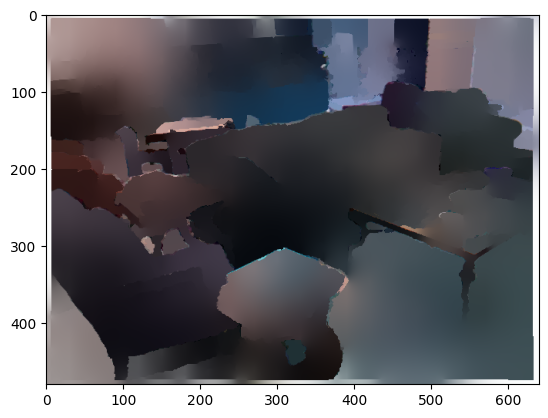

In [ ]:
new_image = depthwise_color_constancy(
    2000,
    0.9999,
    True,
    2,
    depth,
    kernal_shape,
    rgb
).reshape((480,640,3))
plt.imshow(new_image)

In [ ]:
kernal_shape = np.array([
    [0,1,0],
    [1,1,1],
    [0,1,0]
]).astype(np.float32)
mses0_naive, a_c_new0_naive = compute_converagnce(depth, kernal_shape, rgb, 2000, p=0.9999, doesNaive=True, threshold=2)
kernal_shape = np.ones((3,3)).astype(np.float32)
mses1_naive, a_c_new1_naive = compute_converagnce(depth, kernal_shape, rgb, 2000, p=0.9999, doesNaive=True, threshold=2)
kernal_shape = np.ones((5,5)).astype(np.float32)
mses2_naive, a_c_new2_naive = compute_converagnce(depth, kernal_shape, rgb, 2000, p=0.9999, doesNaive=True, threshold=2)
kernal_shape = np.ones((7,7)).astype(np.float32)
mses3_naive, a_c_new3_naive = compute_converagnce(depth, kernal_shape, rgb, 2000, p=0.9999, doesNaive=True, threshold=2)

kernal_shape = np.array([
    [1,0,1],
    [0,1,0],
    [1,0,1]
]).astype(np.float32)
mses4_naive, a_c_new4_naive = compute_converagnce(depth, kernal_shape, rgb, 2000, p=0.9999, doesNaive=True, threshold=2)


100%|██████████| 2000/2000 [00:09<00:00, 204.07it/s]


True

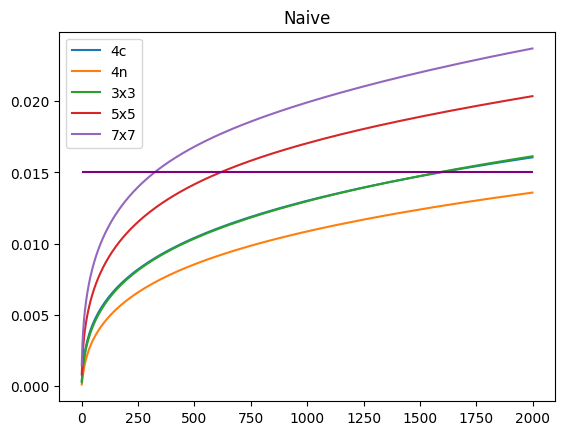

In [ ]:
plt.plot(mses4_naive, label="4c")
plt.plot(mses0_naive, label="4n")
plt.plot(mses1_naive, label="3x3")
plt.plot(mses2_naive, label="5x5")
plt.plot(mses3_naive, label="7x7")
plt.title("Naive")
plt.hlines(y=0.015, xmin=0, xmax=2000, colors="purple")
plt.legend()
cv2.imwrite(f"test.png", a_c_new * 255)

True

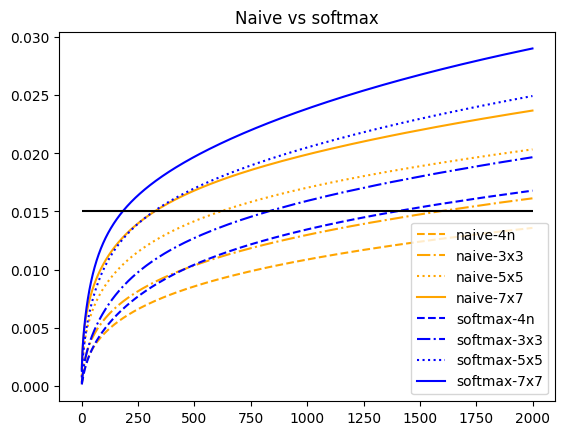

In [ ]:
#plt.plot(mses4_naive, label="naive-4c", c="orange")
plt.plot(mses0_naive, label="naive-4n", c="orange", linestyle="--")
plt.plot(mses1_naive, label="naive-3x3", c="orange", linestyle="-.")
plt.plot(mses2_naive, label="naive-5x5", c="orange", linestyle=":")
plt.plot(mses3_naive, label="naive-7x7", c="orange")
#plt.plot(mses4, label="softmax-4c", c="blue")
plt.plot(mses0, label="softmax-4n", c="blue", linestyle="--")
plt.plot(mses1, label="softmax-3x3", c="blue", linestyle="-.")
plt.plot(mses2, label="softmax-5x5", c="blue", linestyle=":")
plt.plot(mses3, label="softmax-7x7", c="blue")
plt.title("Naive vs softmax")
plt.hlines(y=0.015, xmin=0, xmax=2000, colors="black")
plt.legend()
cv2.imwrite(f"test.png", a_c_new * 255)

# Ploting Variablity

In [ ]:
# from collections import defaultdict

# threshold = 1.5
# iterations = 500 #100
# p = 0.9999
# trials = 10 #100
# with open(f"{data_dir}/nyu2_train.csv", 'r') as file:
#     csv_reader = csv.reader(file)
#     total_rows = sum(1 for row in csv_reader)

# with open(f"{data_dir}/nyu2_train.csv", 'r') as file:
#     row_idices = np.random.choice(np.arange(total_rows), trials, replace=True)
#     experiment = defaultdict(list)
#     print(total_rows, row_idices)

#     i = -1
#     csv_reader = csv.reader(file)
#     for row in csv_reader:
#         #print(i, row)
#         i += 1
#         if i not in row_idices:
#             continue

#         print(i)
#         new_file_path = row[1].replace("nyu2_train", "nyu2_constancy")
#         new_file_parent = "/".join(
#                     new_file_path.split("/")[:-1]
#         )

#         rgb = cv2.imread(f"{data_dir}/../{row[0]}").astype(np.float32)/255
#         depth = cv2.imread(f"{data_dir}/../{row[1]}").astype(np.float32)
#         depth = depth#/depth.max()
#         depth = depth.mean(axis=2)

#         kernal_shape = np.array([
#             [0,1,0],
#             [1,1,1],
#             [0,1,0]
#         ]).astype(np.float32)
#         mses0, a_c_new0 = compute_converagnce(depth, kernal_shape, rgb, iterations, p=p)
#         mses0_naive, a_c_new0_naive = compute_converagnce(depth, kernal_shape, rgb, iterations, p=p, doesNaive=True, threshold=threshold)
        
#         kernal_shape = np.ones((3,3)).astype(np.float32)
#         mses1_naive, a_c_new1_naive = compute_converagnce(depth, kernal_shape, rgb, iterations, p=p, doesNaive=True, threshold=threshold)
#         mses1, a_c_new1 = compute_converagnce(depth, kernal_shape, rgb, iterations, p=p)

#         kernal_shape = np.ones((5,5)).astype(np.float32)
#         mses2_naive, a_c_new2_naive = compute_converagnce(depth, kernal_shape, rgb, iterations, p=p, doesNaive=True, threshold=threshold)
#         mses2, a_c_new1 = compute_converagnce(depth, kernal_shape, rgb, iterations, p=p)

#         kernal_shape = np.ones((7,7)).astype(np.float32)
#         mses3_naive, a_c_new3_naive = compute_converagnce(depth, kernal_shape, rgb, iterations, p=p, doesNaive=True, threshold=threshold)
#         mses3, a_c_new1 = compute_converagnce(depth, kernal_shape, rgb, iterations, p=p)

#         kernal_shape = np.array([
#             [1,0,1],
#             [0,1,0],
#             [1,0,1]
#         ]).astype(np.float32)
#         mses4_naive, a_c_new4_naive = compute_converagnce(depth, kernal_shape, rgb, iterations, p=p, doesNaive=True, threshold=threshold)
#         mses4, a_c_new4 = compute_converagnce(depth, kernal_shape, rgb, iterations, p=p)

#         experiment["navie-4n"].append(mses0_naive)
#         experiment["navie-4c"].append(mses4_naive)
#         experiment["navie-3x3"].append(mses1_naive)
#         experiment["navie-5x5"].append(mses2_naive)
#         experiment["navie-7x7"].append(mses3_naive)
#         experiment["softmax-4n"].append(mses0)
#         experiment["softmax-4c"].append(mses4)
#         experiment["softmax-3x3"].append(mses1)
#         experiment["softmax-5x5"].append(mses2)
#         experiment["softmax-7x7"].append(mses3)   

#         import json
#         with open("experiments.json", 'w') as file:
#             to_save = {key: [arr.tolist() for arr in experiment[key]] for key in experiment.keys()}
#             json.dump(to_save, file, indent=4)         

50688 [31325  6791 23063 44441 24000 38604 19322 42126 23625  2786]


100%|██████████| 500/500 [00:02<00:00, 184.84it/s]


In [2]:
threshold = 1.5
iterations = 500
p = 0.9999
trials = 2000
import json
with open("experiments.json", mode="r") as f:
    experiment = json.load(f)

In [7]:
np.array(experiment["navie-3x3"])

array([[0.00032276, 0.00053525, 0.00075998, ..., 0.00915752, 0.00916394,
        0.00917039],
       [0.00050681, 0.00078607, 0.00112777, ..., 0.01590096, 0.01591053,
        0.01592007],
       [0.00039174, 0.00050502, 0.00067937, ..., 0.01009082, 0.01009834,
        0.01010607],
       ...,
       [0.00044456, 0.00068737, 0.00096762, ..., 0.01358027, 0.0135903 ,
        0.01360037],
       [0.00038408, 0.00060234, 0.0008461 , ..., 0.01376547, 0.01377607,
        0.01378665],
       [0.00047535, 0.00072707, 0.00101829, ..., 0.01480524, 0.01481653,
        0.01482787]], shape=(1973, 500))

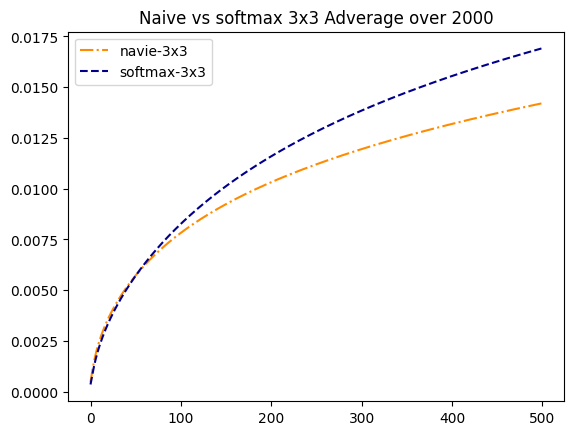

In [12]:

def plot_experiment_data(label="navie-3x3", color="orange", linestyle="-.", fill=False):
    x = np.arange(iterations)
    experiment_data = np.array(experiment[label])
    adv_data = experiment_data.mean(axis=0)
    SE = experiment_data.std(axis=0) / experiment_data.shape[1] ** (1/2)
    max_data = SE + adv_data
    min_data = - SE + adv_data
    if (fill):
        plt.fill_between(x, max_data, min_data, color=color, label=label, linestyle=linestyle, alpha=0.5)
    plt.plot(adv_data, label=label, c=f"dark{color}", linestyle=linestyle)

plot_experiment_data(label="navie-3x3", color="orange", linestyle="-.")
plot_experiment_data(label="softmax-3x3", color="blue", linestyle="--")
plt.title(f"Naive vs softmax 3x3 Adverage over {trials}")
# plt.hlines(y=0.015, xmin=0, xmax=2000, colors="black")
plt.legend()

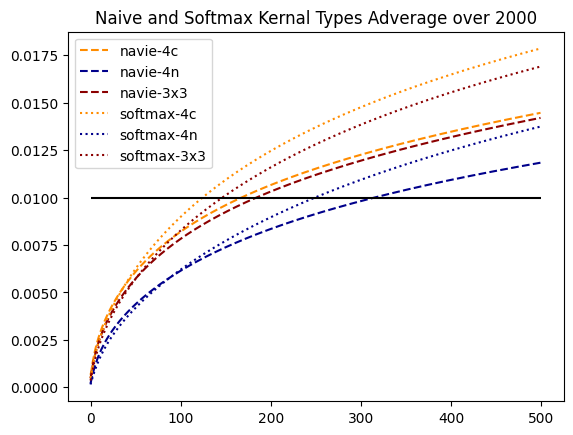

In [13]:
plot_experiment_data(label="navie-4c", color="orange", linestyle="--")
plot_experiment_data(label="navie-4n", color="blue", linestyle="--")
plot_experiment_data(label="navie-3x3", color="red", linestyle="--")
plot_experiment_data(label="softmax-4c", color="orange", linestyle=":")
plot_experiment_data(label="softmax-4n", color="blue", linestyle=":")
plot_experiment_data(label="softmax-3x3", color="red", linestyle=":")
plt.title(f"Naive and Softmax Kernal Types Adverage over {trials}")
plt.hlines(y=0.01, xmin=0, xmax=500, colors="black")
plt.legend()

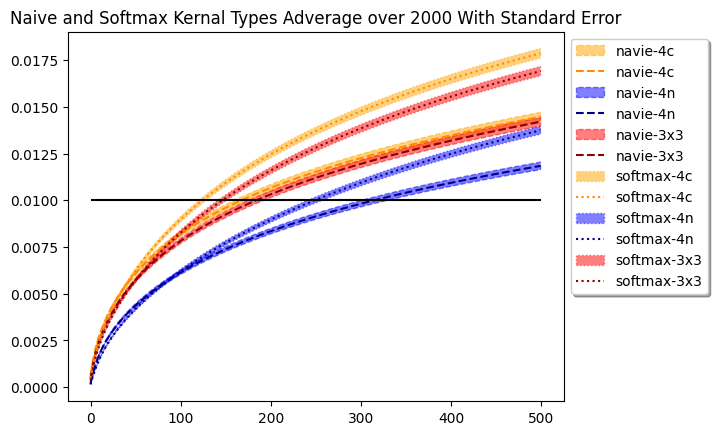

In [ ]:
def plot_experiment_data(label="navie-3x3", color="orange", linestyle="-.", fill=False):
    x = np.arange(iterations)
    experiment_data = np.array(experiment[label])
    adv_data = experiment_data.mean(axis=0)
    SE = experiment_data.std(axis=0) / experiment_data.shape[1] ** (1/2)
    max_data = SE + adv_data
    min_data = - SE + adv_data
    if (fill):
        plt.fill_between(x, max_data, min_data, color=color, label=label, linestyle=linestyle, alpha=0.5)
    plt.plot(adv_data, label=label, c=f"dark{color}", linestyle=linestyle)
plot_experiment_data(label="navie-4c", color="orange", linestyle="--", fill=True)
plot_experiment_data(label="navie-4n", color="blue", linestyle="--", fill=True)
plot_experiment_data(label="navie-3x3", color="red", linestyle="--", fill=True)
plot_experiment_data(label="softmax-4c", color="orange", linestyle=":", fill=True)
plot_experiment_data(label="softmax-4n", color="blue", linestyle=":", fill=True)
plot_experiment_data(label="softmax-3x3", color="red", linestyle=":", fill=True)
plt.title(f"Naive and Softmax Kernal Types Adverage over {trials} With Standard Error")
plt.hlines(y=0.01, xmin=0, xmax=500, colors="black")
plt.legend(loc='upper left', bbox_to_anchor=(1, 1),
          ncol=1, fancybox=True, shadow=True)

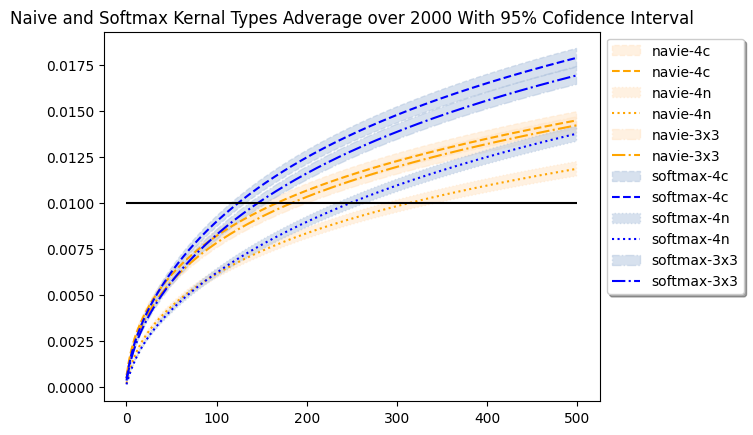

In [38]:
# https://www.westga.edu/academics/research/vrc/assets/docs/confidence_intervals_notes.pdf
# Yes I had to relook up the definition of confidence intervals
# Techically this is assuming the distrbution of each diff is roughly normally distrbuted at each iteration
# Which... maybe? There might be enough randomness to appear normal. Maybe worth checking?

def plot_experiment_data(label="navie-3x3", lightcolor="orange", darkcolor="darkorange", linestyle="-.", fill=False):
    x = np.arange(iterations)
    experiment_data = np.array(experiment[label])
    adv_data = experiment_data.mean(axis=0)
    SE = experiment_data.std(axis=0) / experiment_data.shape[1] ** (1/2)
    max_data = 1.96 * SE + adv_data
    min_data = - 1.96 * SE + adv_data
    if (fill):
        plt.fill_between(x, max_data, min_data, color=lightcolor, label=label, linestyle=linestyle, alpha=0.5)
    plt.plot(adv_data, label=label, c=darkcolor, linestyle=linestyle)
    
plot_experiment_data(label="navie-4c", darkcolor="orange", lightcolor="bisque", linestyle="--", fill=True)
plot_experiment_data(label="navie-4n", darkcolor="orange", lightcolor="bisque", linestyle=":", fill=True)
plot_experiment_data(label="navie-3x3", darkcolor="orange", lightcolor="bisque", linestyle="-.", fill=True)
plot_experiment_data(label="softmax-4c", darkcolor="blue", lightcolor="lightsteelblue", linestyle="--", fill=True)
plot_experiment_data(label="softmax-4n", darkcolor="blue", lightcolor="lightsteelblue", linestyle=":", fill=True)
plot_experiment_data(label="softmax-3x3", darkcolor="blue", lightcolor="lightsteelblue", linestyle="-.", fill=True)
plt.title(f"Naive and Softmax Kernal Types Adverage over {trials} With 95% Cofidence Interval")
plt.hlines(y=0.01, xmin=0, xmax=500, colors="black")
plt.legend(loc='upper left', bbox_to_anchor=(1, 1),
          ncol=1, fancybox=True, shadow=True)

# Sanity Check

In [24]:
def compute_converagnce(depth, kernal_shape, rgb, iterations, p=0.9999, doesNaive=False, threshold=0.0):
    prev_image = rgb.reshape((480,640,3))

    mses = []

    for i in tqdm(range(0, iterations)):
        new_image = depthwise_color_constancy(
            1,
            p,
            doesNaive,
            threshold,
            depth,
            kernal_shape,
            prev_image
        ).reshape((480,640,3))
        mses.append(((rgb - new_image) ** 2).mean())
        prev_image = new_image
    return np.array(mses), new_image

kernal_shape = np.array([
            [0,1,0],
            [1,1,1],
            [0,1,0]
        ]).astype(np.float32)
naive, naive_img = compute_converagnce(depth, kernal_shape, rgb, 
            int((np.array(experiment["navie-4n"]).mean(axis=0) < 0.010).sum()), p=p, doesNaive=True, threshold=threshold)
softmax, softmax_img = compute_converagnce(depth, np.ones((3,3)).astype(np.float32), rgb, 
            int((np.array(experiment["softmax-3x3"]).mean(axis=0) < 0.010).sum()), p=p, doesNaive=True, threshold=threshold)
((softmax_img - naive_img)**2).mean() 

100%|██████████| 147/147 [00:00<00:00, 147.72it/s]


np.float32(0.00014761802)

# Experiment with Reduction towards Base Image

In [10]:
def get_MSE_to_target(
        depth,
        kernal_shape,
        target_kernal_shape, 
        rgb, 
        iterations, 
        p=0.9999, 
        doesNaive=False,
        doesTargetNaive=True,  
        threshold=0.0,
        targetThreshold=1.5):
    
    prev_image = rgb.reshape((480,640,3))

    mses = []

    target_image = depthwise_color_constancy(
            iterations,
            p,
            doesTargetNaive,
            targetThreshold,
            depth,
            target_kernal_shape,
            prev_image
        ).reshape((480,640,3))

    for i in tqdm(range(0, iterations)):
        new_image = depthwise_color_constancy(
            1,
            p,
            doesNaive,
            threshold,
            depth,
            kernal_shape,
            prev_image
        ).reshape((480,640,3))
        mses.append(((target_image - new_image) ** 2).mean())
        prev_image = new_image
    return np.array(mses), new_image

In [14]:
from collections import defaultdict

threshold = 1.5
iterations = 500
p = 0.9999
trials = 100
with open(f"{data_dir}/nyu2_train.csv", 'r') as file:
    csv_reader = csv.reader(file)
    total_rows = sum(1 for row in csv_reader)

with open(f"{data_dir}/nyu2_train.csv", 'r') as file:
    row_idices = np.random.choice(np.arange(total_rows), trials, replace=True)
    experiment = defaultdict(list)
    print(total_rows, row_idices)

    i = -1
    csv_reader = csv.reader(file)
    for row in csv_reader:
        #print(i, row)
        i += 1
        if i not in row_idices:
            continue

        print(i)
        new_file_path = row[1].replace("nyu2_train", "nyu2_constancy")
        new_file_parent = "/".join(
                    new_file_path.split("/")[:-1]
        )

        rgb = cv2.imread(f"{data_dir}/../{row[0]}").astype(np.float32)/255
        depth = cv2.imread(f"{data_dir}/../{row[1]}").astype(np.float32)
        depth = depth#/depth.max()
        depth = depth.mean(axis=2)

        target_kernal = np.array([
            [0,1,0],
            [1,1,1],
            [0,1,0]
        ]).astype(np.float32)

        

        kernal_shape = np.array([
            [0,1,0],
            [1,1,1],
            [0,1,0]
        ]).astype(np.float32)
        mses0, a_c_new0 = get_MSE_to_target(depth, kernal_shape, target_kernal, rgb, iterations, p=p)
        mses0_naive, a_c_new0_naive = get_MSE_to_target(depth, kernal_shape, target_kernal, rgb, iterations, p=p, doesNaive=True, threshold=threshold)
        
        kernal_shape = np.ones((3,3)).astype(np.float32)
        mses1_naive, a_c_new1_naive = get_MSE_to_target(depth, kernal_shape, target_kernal, rgb, iterations, p=p, doesNaive=True, threshold=threshold)
        mses1, a_c_new1 = get_MSE_to_target(depth, kernal_shape, target_kernal, rgb, iterations, p=p)

        kernal_shape = np.ones((5,5)).astype(np.float32)
        mses2_naive, a_c_new2_naive = get_MSE_to_target(depth, kernal_shape, target_kernal, rgb, iterations, p=p, doesNaive=True, threshold=threshold)
        mses2, a_c_new1 = get_MSE_to_target(depth, kernal_shape, target_kernal, rgb, iterations, p=p)

        kernal_shape = np.ones((7,7)).astype(np.float32)
        mses3_naive, a_c_new3_naive = get_MSE_to_target(depth, kernal_shape, target_kernal, rgb, iterations, p=p, doesNaive=True, threshold=threshold)
        mses3, a_c_new1 = get_MSE_to_target(depth, kernal_shape, target_kernal, rgb, iterations, p=p)

        kernal_shape = np.array([
            [1,0,1],
            [0,1,0],
            [1,0,1]
        ]).astype(np.float32)
        mses4_naive, a_c_new4_naive = get_MSE_to_target(depth, kernal_shape, target_kernal, rgb, iterations, p=p, doesNaive=True, threshold=threshold)
        mses4, a_c_new4 = get_MSE_to_target(depth, kernal_shape, target_kernal, rgb, iterations, p=p)

        experiment["navie-4n"].append(mses0_naive)
        experiment["navie-4c"].append(mses4_naive)
        experiment["navie-3x3"].append(mses1_naive)
        experiment["navie-5x5"].append(mses2_naive)
        experiment["navie-7x7"].append(mses3_naive)
        experiment["softmax-4n"].append(mses0)
        experiment["softmax-4c"].append(mses4)
        experiment["softmax-3x3"].append(mses1)
        experiment["softmax-5x5"].append(mses2)
        experiment["softmax-7x7"].append(mses3)   

        import json
        with open("experiments_to_3x3_taget_500.json", 'w') as file:
            to_save = {key: [arr.tolist() for arr in experiment[key]] for key in experiment.keys()}
            json.dump(to_save, file, indent=4)        

50688 [40586 42455 47236 22213 39766 30978 33839 31295 38344 39711 16901 28437
 48365  3611 34859 30295 49363 26555 24311  1633 30268 42670 34938 45019
  8130 49929 16643 30595  8028 23835 50454 49656  6794 22168 47609  4208
  4933 38542 34015 45059 28021 31182 28563 37789 19660 11017 13653  3400
 13790 28289 10423 22442 17154  7026   972 44809  3326 49042 28653 35020
 29603 26588  1011 39036 44545 29632 28432 50275 49685 18900 35305 14895
 28975 30117 46934 10672  5353  5239 34030 10430 27363 24381 33934  6087
    70 41856 44060  7128 19905 25378 25081 32382 16796 26817  6097  3538
 26207 45246 15325 24321]
70


100%|██████████| 500/500 [00:02<00:00, 191.20it/s]


972


100%|██████████| 500/500 [00:02<00:00, 197.72it/s]


1011


100%|██████████| 500/500 [00:02<00:00, 195.03it/s]


1633


100%|██████████| 500/500 [00:02<00:00, 184.53it/s]


3326


100%|██████████| 500/500 [00:02<00:00, 186.00it/s]


3400


100%|██████████| 500/500 [00:02<00:00, 189.15it/s]


3538


100%|██████████| 500/500 [00:02<00:00, 201.59it/s]


3611


100%|██████████| 500/500 [00:02<00:00, 192.98it/s]


4208


100%|██████████| 500/500 [00:02<00:00, 183.83it/s]


4933


100%|██████████| 500/500 [00:02<00:00, 185.95it/s]


5239


100%|██████████| 500/500 [00:02<00:00, 190.96it/s]


5353


100%|██████████| 500/500 [00:02<00:00, 196.13it/s]


6087


100%|██████████| 500/500 [00:02<00:00, 177.01it/s]


6097


100%|██████████| 500/500 [00:02<00:00, 188.02it/s]


6794


100%|██████████| 500/500 [00:02<00:00, 187.92it/s]


7026


100%|██████████| 500/500 [00:02<00:00, 189.52it/s]


7128


100%|██████████| 500/500 [00:02<00:00, 190.01it/s]


8028


100%|██████████| 500/500 [00:02<00:00, 200.32it/s]


8130


100%|██████████| 500/500 [00:02<00:00, 193.34it/s]


10423


100%|██████████| 500/500 [00:02<00:00, 181.82it/s]


10430


100%|██████████| 500/500 [00:02<00:00, 189.01it/s]


10672


100%|██████████| 500/500 [00:02<00:00, 189.20it/s]


11017


100%|██████████| 500/500 [00:02<00:00, 190.53it/s]


13653


100%|██████████| 500/500 [00:02<00:00, 191.03it/s]


13790


100%|██████████| 500/500 [00:02<00:00, 191.77it/s]


14895


100%|██████████| 500/500 [00:02<00:00, 181.92it/s]


15325


100%|██████████| 500/500 [00:02<00:00, 189.49it/s]


16643


100%|██████████| 500/500 [00:02<00:00, 190.77it/s]


16796


100%|██████████| 500/500 [00:02<00:00, 194.53it/s]


16901


100%|██████████| 500/500 [00:02<00:00, 192.02it/s]


17154


100%|██████████| 500/500 [00:02<00:00, 193.00it/s]


18900


100%|██████████| 500/500 [00:02<00:00, 183.31it/s]


19660


100%|██████████| 500/500 [00:02<00:00, 185.14it/s]


19905


100%|██████████| 500/500 [00:02<00:00, 192.47it/s]


22168


100%|██████████| 500/500 [00:02<00:00, 192.97it/s]


22213


100%|██████████| 500/500 [00:02<00:00, 187.41it/s]


22442


100%|██████████| 500/500 [00:02<00:00, 191.61it/s]


23835


100%|██████████| 500/500 [00:02<00:00, 183.19it/s]


24311


100%|██████████| 500/500 [00:02<00:00, 187.52it/s]


24321


100%|██████████| 500/500 [00:02<00:00, 215.85it/s]


24381


100%|██████████| 500/500 [00:02<00:00, 214.86it/s]


25081


100%|██████████| 500/500 [00:02<00:00, 206.52it/s]


25378


100%|██████████| 500/500 [00:02<00:00, 184.43it/s]


26207


100%|██████████| 500/500 [00:02<00:00, 190.31it/s]


26555


100%|██████████| 500/500 [00:02<00:00, 193.39it/s]


26588


100%|██████████| 500/500 [00:02<00:00, 197.36it/s]


26817


100%|██████████| 500/500 [00:02<00:00, 179.16it/s]


27363


100%|██████████| 500/500 [00:02<00:00, 189.20it/s]


28021


100%|██████████| 500/500 [00:02<00:00, 184.66it/s]


28289


100%|██████████| 500/500 [00:02<00:00, 189.40it/s]


28432


100%|██████████| 500/500 [00:02<00:00, 188.52it/s]


28437


100%|██████████| 500/500 [00:02<00:00, 202.02it/s]


28563


100%|██████████| 500/500 [00:02<00:00, 182.41it/s]


28653


100%|██████████| 500/500 [00:02<00:00, 187.98it/s]


28975


100%|██████████| 500/500 [00:02<00:00, 192.85it/s]


29603


100%|██████████| 500/500 [00:02<00:00, 196.61it/s]


29632


100%|██████████| 500/500 [00:02<00:00, 206.90it/s]


30117


100%|██████████| 500/500 [00:02<00:00, 179.31it/s]


30268


100%|██████████| 500/500 [00:02<00:00, 194.70it/s]


30295


100%|██████████| 500/500 [00:02<00:00, 186.05it/s]


30595


100%|██████████| 500/500 [00:02<00:00, 186.78it/s]


30978


100%|██████████| 500/500 [00:02<00:00, 197.29it/s]


31182


100%|██████████| 500/500 [00:02<00:00, 197.90it/s]


31295


100%|██████████| 500/500 [00:02<00:00, 184.47it/s]


32382


100%|██████████| 500/500 [00:02<00:00, 189.81it/s]


33839


100%|██████████| 500/500 [00:02<00:00, 184.16it/s]


33934


100%|██████████| 500/500 [00:02<00:00, 189.68it/s]


34015


100%|██████████| 500/500 [00:02<00:00, 191.84it/s]


34030


100%|██████████| 500/500 [00:02<00:00, 209.24it/s]


34859


100%|██████████| 500/500 [00:02<00:00, 185.95it/s]


34938


100%|██████████| 500/500 [00:02<00:00, 182.34it/s]


35020


100%|██████████| 500/500 [00:02<00:00, 186.78it/s]


35305


100%|██████████| 500/500 [00:02<00:00, 183.94it/s]


37789


100%|██████████| 500/500 [00:02<00:00, 194.76it/s]


38344


100%|██████████| 500/500 [00:02<00:00, 205.12it/s]


38542


100%|██████████| 500/500 [00:02<00:00, 186.75it/s]


39036


100%|██████████| 500/500 [00:02<00:00, 185.29it/s]


39711


100%|██████████| 500/500 [00:02<00:00, 190.24it/s]


39766


100%|██████████| 500/500 [00:02<00:00, 185.63it/s]


40586


100%|██████████| 500/500 [00:02<00:00, 199.67it/s]


41856


100%|██████████| 500/500 [00:02<00:00, 207.31it/s]


42455


100%|██████████| 500/500 [00:02<00:00, 186.82it/s]


42670


100%|██████████| 500/500 [00:02<00:00, 190.76it/s]


44060


100%|██████████| 500/500 [00:02<00:00, 193.70it/s]


44545


100%|██████████| 500/500 [00:02<00:00, 181.83it/s]


44809


100%|██████████| 500/500 [00:02<00:00, 192.29it/s]


45019


100%|██████████| 500/500 [00:02<00:00, 188.55it/s]


45059


100%|██████████| 500/500 [00:02<00:00, 199.58it/s]


45246


100%|██████████| 500/500 [00:02<00:00, 185.25it/s]


46934


100%|██████████| 500/500 [00:02<00:00, 186.27it/s]


47236


100%|██████████| 500/500 [00:02<00:00, 186.43it/s]


47609


100%|██████████| 500/500 [00:02<00:00, 185.99it/s]


48365


100%|██████████| 500/500 [00:02<00:00, 194.09it/s]


49042


100%|██████████| 500/500 [00:02<00:00, 191.33it/s]


49363


100%|██████████| 500/500 [00:02<00:00, 197.44it/s]


49656


100%|██████████| 500/500 [00:02<00:00, 196.50it/s]


49685


100%|██████████| 500/500 [00:02<00:00, 192.11it/s]


49929


100%|██████████| 500/500 [00:02<00:00, 188.01it/s]


50275


100%|██████████| 500/500 [00:02<00:00, 193.39it/s]


50454


100%|██████████| 500/500 [00:02<00:00, 190.11it/s]


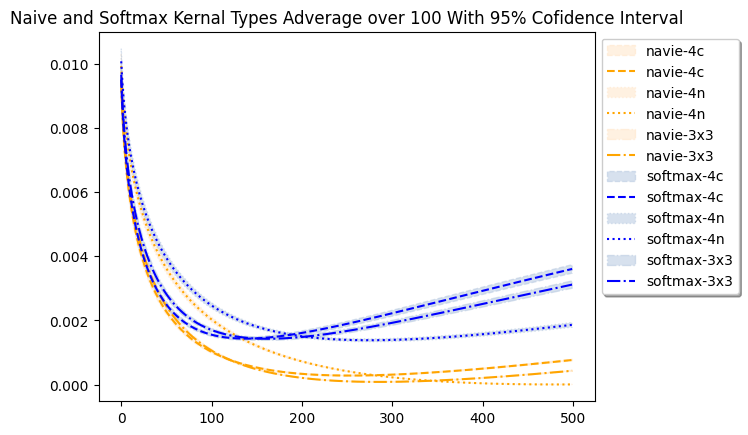

In [16]:
# https://www.westga.edu/academics/research/vrc/assets/docs/confidence_intervals_notes.pdf
# Yes I had to relook up the definition of confidence intervals
# Techically this is assuming the distrbution of each diff is roughly normally distrbuted at each iteration
# Which... maybe? There might be enough randomness to appear normal. Maybe worth checking?

def plot_experiment_data(label="navie-3x3", lightcolor="orange", darkcolor="darkorange", linestyle="-.", fill=False):
    x = np.arange(iterations)
    experiment_data = np.array(experiment[label])
    adv_data = experiment_data.mean(axis=0)
    SE = experiment_data.std(axis=0) / experiment_data.shape[1] ** (1/2)
    max_data = 1.96 * SE + adv_data
    min_data = - 1.96 * SE + adv_data
    if (fill):
        plt.fill_between(x, max_data, min_data, color=lightcolor, label=label, linestyle=linestyle, alpha=0.5)
    plt.plot(adv_data, label=label, c=darkcolor, linestyle=linestyle)
    
plot_experiment_data(label="navie-4c", darkcolor="orange", lightcolor="bisque", linestyle="--", fill=True)
plot_experiment_data(label="navie-4n", darkcolor="orange", lightcolor="bisque", linestyle=":", fill=True)
plot_experiment_data(label="navie-3x3", darkcolor="orange", lightcolor="bisque", linestyle="-.", fill=True)
plot_experiment_data(label="softmax-4c", darkcolor="blue", lightcolor="lightsteelblue", linestyle="--", fill=True)
plot_experiment_data(label="softmax-4n", darkcolor="blue", lightcolor="lightsteelblue", linestyle=":", fill=True)
plot_experiment_data(label="softmax-3x3", darkcolor="blue", lightcolor="lightsteelblue", linestyle="-.", fill=True)
plt.title(f"Naive and Softmax Kernal Types Adverage over {trials} With 95% Cofidence Interval")
#plt.hlines(y=0.01, xmin=0, xmax=500, colors="black")
plt.legend(loc='upper left', bbox_to_anchor=(1, 1),
          ncol=1, fancybox=True, shadow=True)